In [3]:
from __future__ import print_function
%matplotlib inline
import geopandas as gpd
import numpy as np
import pylab as pl
import pandas as pd
import io
import os
import shapely
import matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame, read_file
from geopandas.tools import sjoin
import pysal as ps
#!conda install rtree
from fiona.crs import from_epsg

In [4]:
#Import Airbnb shapefile
GreenSpace = gpd.GeoDataFrame.from_file('Green Spaces/geo_export_082cf1b6-52ed-40bb-9b52-13945bdb1f98.shp')

In [5]:
GreenSpace.head()

,feat_code,landuse,park_name,parknum,shape_area,shape_leng,source_id,status,sub_code,system,geometry
0,4910.0,Community Park,Commodore Barry Park,B021,41539.801363,829.420107,2.149100e+10,Updated,491050.0,None,POLYGON ((-73.97922375065221 40.69799879369959...
1,4980.0,Neighborhood Park,Pierrepont Playground,B222,21960.494920,607.555193,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99732028095745 40.69600764072165...
2,4980.0,Neighborhood Park,Cobble Hill Park,B326,28079.076265,784.421990,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99557419919979 40.68792918280799...
3,4980.0,Community Park,Commodore Barry Park,B021,438416.114511,2672.710150,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.97746661925957 40.69650941986475...
4,4980.0,Triangle/Plaza,Brooklyn Heights Promenade,B223DG,14465.699799,1376.106398,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99746719287955 40.69692380834881...


In [7]:
#Import airbnb space shapefile
AirBnB = gpd.GeoDataFrame.from_file('airbnbGBF/airbnbGBF.shp')

In [8]:
AirBnB.neighbou_2.unique()

array([u'Manhattan', u'Brooklyn', u'Queens', u'Bronx', u'Staten Island'],
      dtype=object)

In [7]:
AirBnB.head()

,neighbourh,neighbou_1,neighbou_2,smart_loca,latitude,longitude,price,weekly_pri,monthly_pr,geometry
0,Harlem,Harlem,Manhattan,"New York, NY",40.799205,-73.953676,$59.00,$720.00,"$1,690.00",POINT (-73.95367574543542 40.79920479936168)
1,Kensington,Kensington,Brooklyn,"Brooklyn , NY",40.647486,-73.972370,$149.00,$299.00,$999.00,POINT (-73.97236954007957 40.64748608166989)
2,Midtown,Midtown,Manhattan,"New York, NY",40.753621,-73.983774,$225.00,"$1,995.00",None,POINT (-73.98377381114605 40.75362072657246)
3,Williamsburg,Williamsburg,Brooklyn,"Brooklyn, NY",40.708558,-73.942362,$70.00,$650.00,"$1,900.00",POINT (-73.94236227640226 40.70855778333159)
4,Harlem,Harlem,Manhattan,"New York, NY",40.809018,-73.941902,$150.00,None,None,POINT (-73.94190208041947 40.80901784905571)


In [ ]:
# Create buffer around greenspaces

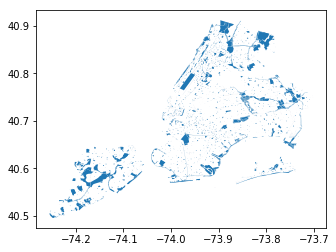

In [9]:
GreenSpace.plot()

In [ ]:
# Let's look at just Washington Sq Park

In [10]:
wsq = GreenSpace.loc[GreenSpace.park_name== 'Washington Square Park']

In [11]:
wsq

,feat_code,landuse,park_name,parknum,shape_area,shape_leng,source_id,status,sub_code,system,geometry
4510,4980.0,Neighborhood Park,Washington Square Park,M098,434508.821798,2815.318767,1.249800e+10,Unchanged,498000.0,None,"POLYGON ((-73.9965866265607 40.72965140215158,..."


In [30]:
wsq.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

In [32]:
wsq.crs

{'init': 'epsg:4326', 'no_defs': True}

In [125]:
mideg?

In [12]:
def mideg(mi):
    """Converts miles into kilometers. 
    Then it converts that to degrees. 
    Then it makes the units accurate"""
    conversion_factor = 0.62137119
    kilometers = mi / conversion_factor
    first = 111000/kilometers
    second = first *.000000001
    return second

In [61]:
mideg(12)

5.7476835075e-06

In [13]:
def buffermaker(df,dist):
    """This creates a buffer around the dataframe entered.
    Input: dataframe and distance in miles you want it to buffer.
    Output: polygon shape"""
    df = df.buffer(mideg(dist))
    df = GeoDataFrame(df)
    df.rename(columns = {0:'geometry'},inplace = True)
    return df
    

In [59]:
dilated1 = buffermaker(wsq,12)

In [60]:
dilated1.head()

,geometry
4510,POLYGON ((-73.99658224475751 40.72964768251902...


In [49]:
dilated = buffermaker(wsq,1)

In [113]:
#mideg(.5)

0.00013794440418000002

In [36]:
#halfmi = .000138

In [37]:
# create buffer for .5 degree away 
#dilated = wsq.buffer(halfmi)

In [16]:
dilated.head()

,geometry
4510,POLYGON ((-73.99648146328398 40.72956213096991...


In [60]:
#make into geodataframe
#halfmiShp = GeoDataFrame(dilated )

In [65]:
#halfmiShp.head()

,geometry
4510,POLYGON ((-73.99648142089997 40.72956209499089...


In [64]:
#halfmiShp.rename(columns = {0:'geometry'},inplace = True)

In [21]:
wsq = GeoDataFrame(wsq)

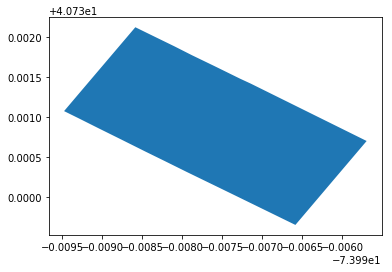

In [22]:
wsq.plot()

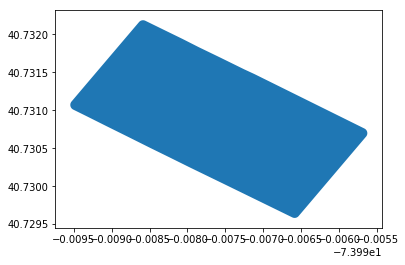

In [50]:
dilated.plot()

In [ ]:
# Do a spatial join with AirBnB

In [70]:
AirBnB.head()

,neighbourh,neighbou_1,neighbou_2,smart_loca,latitude,longitude,price,weekly_pri,monthly_pr,geometry
0,Harlem,Harlem,Manhattan,"New York, NY",40.799205,-73.953676,$59.00,$720.00,"$1,690.00",POINT (-73.95367574543542 40.79920479936168)
1,Kensington,Kensington,Brooklyn,"Brooklyn , NY",40.647486,-73.972370,$149.00,$299.00,$999.00,POINT (-73.97236954007957 40.64748608166989)
2,Midtown,Midtown,Manhattan,"New York, NY",40.753621,-73.983774,$225.00,"$1,995.00",None,POINT (-73.98377381114605 40.75362072657246)
3,Williamsburg,Williamsburg,Brooklyn,"Brooklyn, NY",40.708558,-73.942362,$70.00,$650.00,"$1,900.00",POINT (-73.94236227640226 40.70855778333159)
4,Harlem,Harlem,Manhattan,"New York, NY",40.809018,-73.941902,$150.00,None,None,POINT (-73.94190208041947 40.80901784905571)


In [51]:
# convert to 2263
AirBnB = GeoDataFrame(AirBnB)

AirBnB.crs = from_epsg(4326)
dilated.crs = from_epsg(4326)

In [52]:
AirBnB_ft = AirBnB.to_crs(epsg=2263)
dilated_ft = dilated.to_crs(epsg=2263)

In [53]:
Joined = gpd.sjoin(AirBnB_ft, dilated_ft,how="inner", op='intersects')

In [54]:
Joined.head()

,neighbourh,neighbou_1,neighbou_2,smart_loca,latitude,longitude,price,weekly_pri,monthly_pr,geometry,index_right
1433,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.731096,-73.999128,$165.00,"$1,200.00","$3,200.00",POINT (984491.5524066965 205634.4290553568),4510
1437,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.731758,-73.998949,$295.00,None,None,POINT (984541.2637675313 205875.8407783135),4510
1909,None,Greenwich Village,Manhattan,"New York, NY",40.730070,-73.996238,$299.00,"$2,200.00",None,POINT (985292.6426519722 205260.9558023504),4510
2915,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.730360,-73.995988,$160.00,None,"$3,500.00",POINT (985361.9672762316 205366.3924610128),4510
10956,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.731040,-73.997084,$230.00,"$1,570.00","$6,000.00",POINT (985058.2151975413 205614.0361464809),4510


In [55]:
# combine lat and lon to one column
Joined['lonlat']=list(zip(Joined.longitude,Joined.latitude))
# Create Point Geometry for based on lonlat column
Joined['geometry']=Joined[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
Joined.head()

,neighbourh,neighbou_1,neighbou_2,smart_loca,latitude,longitude,price,weekly_pri,monthly_pr,geometry,index_right,lonlat
1433,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.731096,-73.999128,$165.00,"$1,200.00","$3,200.00",POINT (-73.99912844631929 40.7310956382122),4510,"(-73.9991284463, 40.7310956382)"
1437,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.731758,-73.998949,$295.00,None,None,POINT (-73.9989490705707 40.73175825271198),4510,"(-73.9989490706, 40.7317582527)"
1909,None,Greenwich Village,Manhattan,"New York, NY",40.730070,-73.996238,$299.00,"$2,200.00",None,POINT (-73.9962380624812 40.73007048741817),4510,"(-73.9962380625, 40.7300704874)"
2915,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.730360,-73.995988,$160.00,None,"$3,500.00",POINT (-73.99598791630588 40.73035987680285),4510,"(-73.9959879163, 40.7303598768)"
10956,Greenwich Village,Greenwich Village,Manhattan,"New York, NY",40.731040,-73.997084,$230.00,"$1,570.00","$6,000.00",POINT (-73.99708385294961 40.73103963104728),4510,"(-73.9970838529, 40.731039631)"


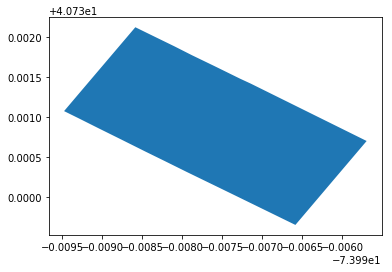

In [42]:
wsq.plot()

In [ ]:
wsq = GeoDataFrame(wsq)

In [26]:
wsq.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

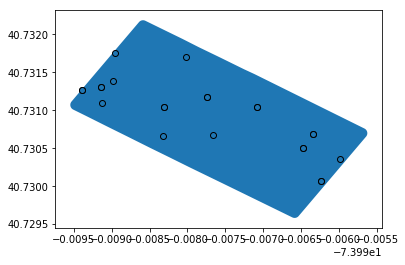

In [56]:
base = dilated.plot()
Joined.plot(edgecolor='black',figsize=(10,10),ax=base)

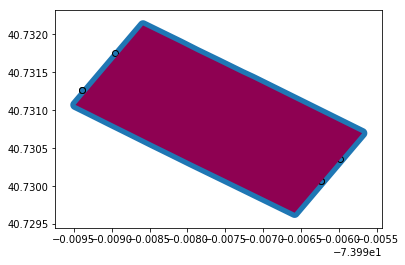

In [57]:
base = dilated.plot()
Joined.plot(edgecolor='black',figsize=(10,10),ax=base)
wsq.plot(ax=base, cmap='PiYG')

In [145]:
Joined = GeoDataFrame(Joined)

In [148]:
Joined.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

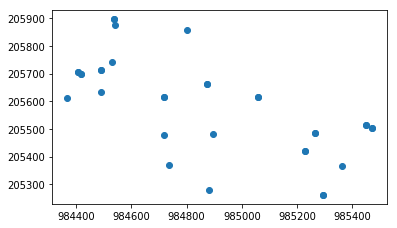

In [156]:
Joined.plot()

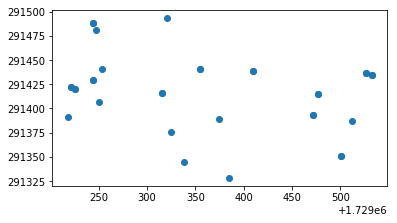

In [149]:
Joined.to_crs(naec).plot()

In [ ]:
# Make a raster out of the points

In [151]:
Joined = gpd.GeoDataFrame.from_file('Output/wspExample.shp')

In [91]:
Joined.shape

(34, 11)

In [135]:
%mkdir Output

In [152]:
path='Output/wspExample.shp'
Joined.to_file(path)

In [153]:
qW_CT=ps.queen_from_shapefile(path)

AttributeError: 'Point' object has no attribute 'bbox'

In [ ]:
#write a function to test for Moran's I